# 1. 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用流形降维算法（局部线性嵌入法）降维瑞士卷数据集
"""

# 导入包
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn import datasets,decomposition,manifold
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D


# 2. 生成瑞士卷数据集

In [2]:
# 生成瑞士卷数据集
swiss_roll_dataset =datasets.make_swiss_roll(n_samples=1000)
x = swiss_roll_dataset[0]
y = np.floor(swiss_roll_dataset[1])
print(x.shape)
print(y.shape)

(1000, 3)
(1000,)


# 3. 可视化瑞士卷数据集

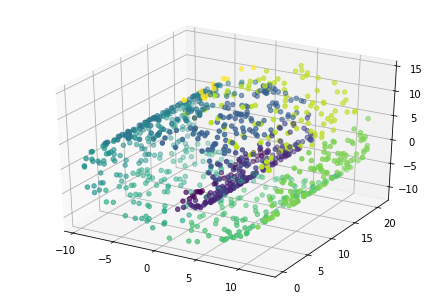

In [3]:
# 可视化瑞士卷数据集
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],marker='o',c=y)

# 4. 不同自变量个数对应的重建误差

In [4]:
# 不同自变量个数对应的重建误差
def LLE_components(*data):
    X, Y = data
    for n in [3,2,1]:
        lle = manifold.LocallyLinearEmbedding(n_components=n) # LLE算法对应的类是LocallyLinearEmbedding
        lle.fit(X)
        print("n = %d 重建误差："%n, lle.reconstruction_error_)



In [5]:
LLE_components(x, y)

n = 3 重建误差： 4.236836332800825e-11
n = 2 重建误差： 3.195687960331052e-12
n = 1 重建误差： -1.2447777987062779e-17


# 5. 可视化LLE降维效果

In [6]:
# 显示重构后的数据
def LLE_neighbors(*data):
    X, Y = data
    Neighbors = [1, 2, 3, 4, 5, 15, 30, 100, Y.size-1] # 搜索样本的近邻的个数，越大，则降维后样本的局部关系会保持的更好
    fig = plt.figure("LLE", figsize = (9, 9))
    for i, k in enumerate(Neighbors):
        lle = manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=k,eigen_solver='dense') # 降维到二维,搜索样本紧邻个数，特征分解用dense
        X_r = lle.fit_transform(X) # X_r是降维后的数据
        ax = fig.add_subplot(3,3,i+1) # 3x3的fig图
        ax.scatter(X_r[:,0],X_r[:,1],marker='o',c=Y,alpha=0.5) # 画散点图
        ax.set_title("k = %d"%k) # 设置标题
        plt.xticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
        plt.yticks(fontsize=10, color="darkorange") # 设置y轴的字体大小及颜色
    plt.suptitle("LLE") #总图标题
    plt.show()

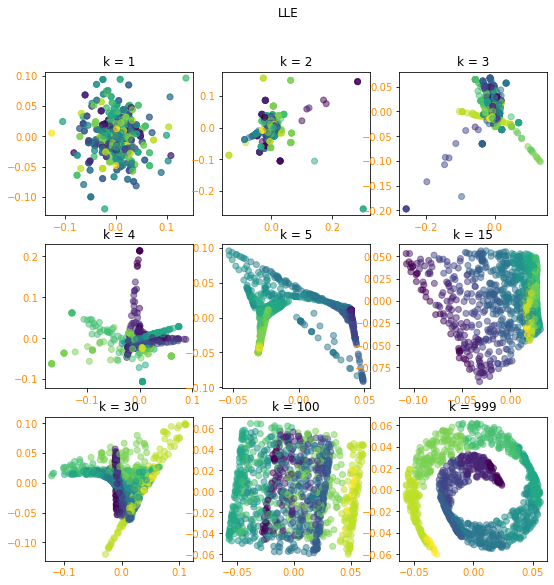

In [7]:
LLE_neighbors(x, y)

#### 3维的瑞士卷数据集被映射到二维